In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy
import matplotlib
import pandas as pd
import scipy
from scipy.spatial import distance
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn import linear_model
from sklearn import neighbors
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from imutils import paths
import os
from sklearn.metrics import classification_report
import cv2
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

%matplotlib inline

In [9]:
df = pd.read_csv('diabetes.csv')
data = df.head(590)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
len(data[data['Outcome'] == 0])

386

In [11]:
train = data.head(int(len(data)*0.8))
test = data.tail(int(len(data)*0.2))
features = list(train.columns[:8])
x = train[features]
y = train['Outcome']

In [12]:
tree = DecisionTreeClassifier(criterion='entropy', #критерий разделения
                              min_samples_leaf=20, #минимальное число объектов в листе
                              max_leaf_nodes=30, #максимальное число листьев
                              random_state=2020)
clf=tree.fit(x, y)

In [13]:
columns = list(x.columns)
export_graphviz(clf, out_file='tree.dot', 
                feature_names=columns,
                class_names=['0', '1'],
                rounded = True, proportion = False, 
                precision = 2, filled = True, label='all')

with open('tree.dot') as f:
    dot_graph = f.read()

s = graphviz.Source(dot_graph, filename="tree.dot", format="png")
s.view()

'tree.dot.png'

In [14]:
clf.tree_.max_depth

7

In [16]:
features = list(test.columns[:8])
x = test[features]
y_true = test['Outcome']
y_pred = clf.predict(x)

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)

0.7627118644067796

In [18]:
from sklearn.metrics import f1_score
f1_score(y_true, y_pred, average='macro')

0.6722222222222223

In [19]:
df.loc[708, features]

Pregnancies                   9.000
Glucose                     164.000
BloodPressure                78.000
SkinThickness                 0.000
Insulin                       0.000
BMI                          32.800
DiabetesPedigreeFunction      0.148
Age                          45.000
Name: 708, dtype: float64

In [20]:
clf.predict([df.loc[705, features].tolist()])[0]

0

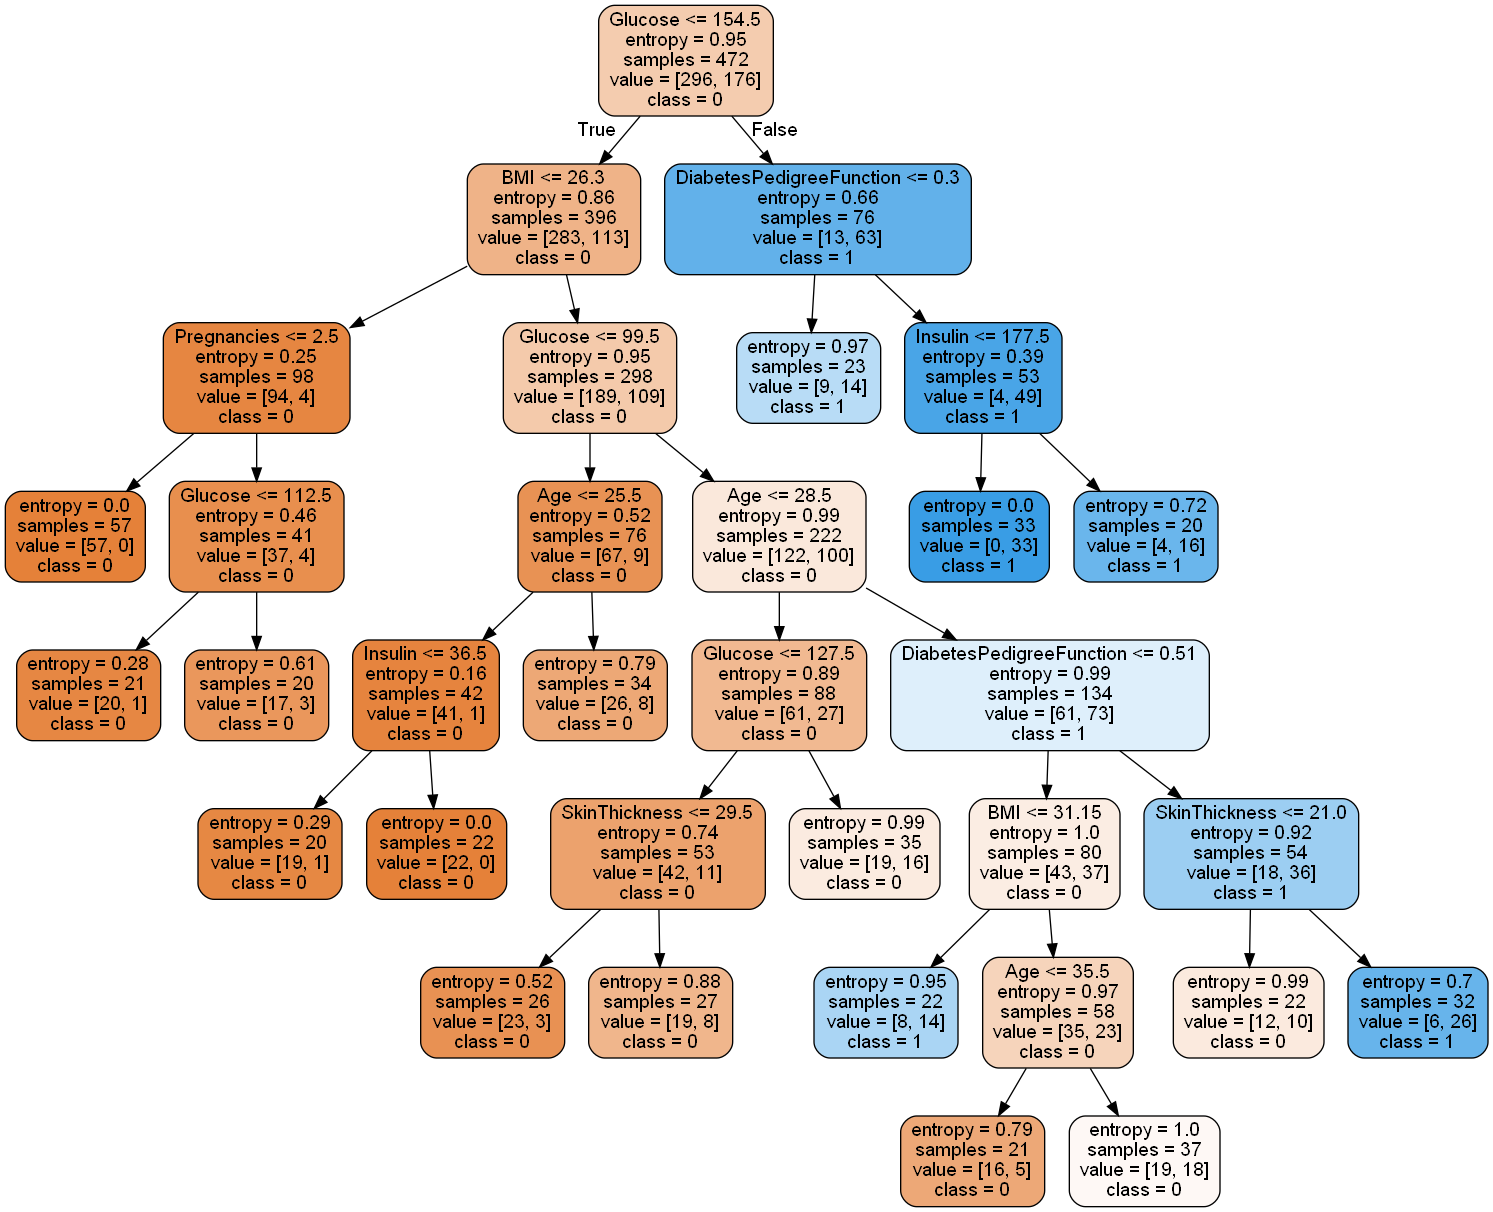

In [21]:
import pydot
(graph,) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')

from IPython.core.display import Image, display
display(Image('tree.png', unconfined=True))